# Transformers

## A simple implementation of a self-attention mechanism

In [ ]:
import numpy as np

def simplified_attention(query, key, value):
    """
    A simplified self-attention mechanism

    Parameters:
    - query: The query matrix
    - key: The key matrix
    - value: The value matrix

    Returns:
    - attention_output: Weighted sum of values
    """
    # Calculate attention scores
    scores = np.dot(query, key.T)

    # Apply softmax to get attention weights
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)

    # Get weighted sum of values
    attention_output = np.dot(attention_weights, value)

    return attention_output, attention_weights

# Example usage
seq_length = 4
embed_dim = 8

# Random embeddings for a sequence of 4 tokens
embeddings = np.random.randn(seq_length, embed_dim)

# In self-attention, the same embeddings serve as query, key, and value
query = key = value = embeddings

output, weights = simplified_attention(query, key, value)

print("Input embeddings shape:", embeddings.shape)
print("Attention weights shape:", weights.shape)
print("Output shape:", output.shape)
print("\nSample attention weights:\n", weights[0])  # Attention weights for first token

Input embeddings shape: (4, 8)
Attention weights shape: (4, 4)
Output shape: (4, 8)

Sample attention weights:
 [9.99432533e-01 4.02563020e-06 4.43214293e-04 1.20226779e-04]


## Improved self-attention mechanism

  - Added scaling of the attention scores
  - Added masking supprot for causal attention
  - Improved error handling

In [ ]:
import numpy as np

def scaled_dot_product_attention(query, key, value, mask=None, scale=True):
    """
    Computes scaled dot-product attention with optional masking.

    Parameters:
    - query: Query matrix of shape (seq_length, embed_dim)
    - key: Key matrix of shape (seq_length, embed_dim)
    - value: Value matrix of shape (seq_length, embed_dim)
    - mask: Optional mask of shape (seq_length, seq_length) where mask[i, j] = 0
            indicates that token i should not attend to token j (default: None)
    - scale: Whether to scale the attention scores by sqrt(embed_dim) (default: True)

    Returns:
    - attention_output: Weighted sum of values, shape (seq_length, embed_dim)
    - attention_weights: Attention weights, shape (seq_length, seq_length)
    """
    # Input validation
    if not (query.shape == key.shape == value.shape):
        raise ValueError("Query, key, and value must have the same shape.")
    seq_length, embed_dim = query.shape

    # Calculate attention scores
    scores = np.dot(query, key.T)  # Shape: (seq_length, seq_length)

    # Scale the scores to prevent large values
    if scale:
        scores = scores / np.sqrt(embed_dim)

    # Apply mask (if provided) to prevent attention to certain tokens
    if mask is not None:
        if mask.shape != (seq_length, seq_length):
            raise ValueError(f"Mask must have shape ({seq_length}, {seq_length}), got {mask.shape}")
        scores = scores + (mask * -1e9)  # Large negative value to mask positions

    # Apply softmax with numerical stability
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))  # Subtract max for stability
    attention_weights = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute weighted sum of values
    attention_output = np.dot(attention_weights, value)  # Shape: (seq_length, embed_dim)

    return attention_output, attention_weights

# Example usage with masking
seq_length = 4
embed_dim = 8

# Random embeddings for a sequence of 4 tokens
embeddings = np.random.randn(seq_length, embed_dim)

# In self-attention, the same embeddings serve as query, key, and value
query = key = value = embeddings

# Create a causal mask (for autoregressive tasks, e.g., GPT)
causal_mask = np.triu(np.ones((seq_length, seq_length)), k=1)  # Upper triangle = 1, rest = 0

# Compute attention with scaling and masking
output, weights = scaled_dot_product_attention(query, key, value, mask=causal_mask)

# Print shapes and sample weights
print("Input embeddings shape:", embeddings.shape)
print("Attention weights shape:", weights.shape)
print("Output shape:", output.shape)
print("\nSample attention weights for first token:\n", weights[0])

Input embeddings shape: (4, 8)
Attention weights shape: (4, 4)
Output shape: (4, 8)

Sample attention weights for first token:
 [1. 0. 0. 0.]


## Simplified attention mechanism with linear transformation

In [ ]:
import numpy as np

def simplified_attention_with_linear_transform(query, key, value):
    """
    A simplified self-attention mechanism with linear transformations.

    Parameters:
    - query: The query matrix (before transformation)
    - key: The key matrix (before transformation)
    - value: The value matrix (before transformation)

    Returns:
    - attention_output: Weighted sum of values
    - attention_weights: Attention weights
    """
    # Get dimensions
    seq_length, embed_dim = query.shape

    # Define random weight matrices for linear transformations (simulating learned weights)
    W_q = np.random.randn(embed_dim, embed_dim)  # Weight matrix for query
    W_k = np.random.randn(embed_dim, embed_dim)  # Weight matrix for key
    W_v = np.random.randn(embed_dim, embed_dim)  # Weight matrix for value

    # Apply linear transformations to get query, key, and value
    transformed_query = np.dot(query, W_q)  # Shape: (seq_length, embed_dim)
    transformed_key = np.dot(key, W_k)      # Shape: (seq_length, embed_dim)
    transformed_value = np.dot(value, W_v)  # Shape: (seq_length, embed_dim)

    # Calculate attention scores
    scores = np.dot(transformed_query, transformed_key.T)  # Shape: (seq_length, seq_length)

    # Apply softmax to get attention weights
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)

    # Get weighted sum of values
    attention_output = np.dot(attention_weights, transformed_value)  # Shape: (seq_length, embed_dim)

    return attention_output, attention_weights

# Example usage
seq_length = 4
embed_dim = 8

# Random embeddings for a sequence of 4 tokens
embeddings = np.random.randn(seq_length, embed_dim)

# In self-attention, the same embeddings serve as the initial query, key, and value
query = key = value = embeddings

# Compute attention with linear transformations
output, weights = simplified_attention_with_linear_transform(query, key, value)

# Print shapes and sample weights
print("Input embeddings shape:", embeddings.shape)
print("Attention weights shape:", weights.shape)
print("Output shape:", output.shape)
print("\nSample attention weights for first token:\n", weights[0])

Input embeddings shape: (4, 8)
Attention weights shape: (4, 4)
Output shape: (4, 8)

Sample attention weights for first token:
 [7.09519402e-18 5.50270147e-25 1.00000000e+00 1.34201733e-19]


## Transformers with PyTorch

In [ ]:
import torch
import torch.nn as nn

class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super(TransformerBlock, self).__init__()

        # Multi-head attention
        self.attention = nn.MultiheadAttention(embed_dim, num_heads, dropout=dropout)

        # Feed-forward layer
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )

        # Layer normalization
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.layernorm2 = nn.LayerNorm(embed_dim)

        # Dropout
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        # Multi-head attention with residual connection and layer norm
        attn_output, _ = self.attention(x, x, x, attn_mask=mask)
        x = self.layernorm1(x + self.dropout(attn_output))

        # Feed-forward with residual connection and layer norm
        ff_output = self.feed_forward(x)
        x = self.layernorm2(x + self.dropout(ff_output))

        return x

# Example usage
batch_size = 16
seq_length = 10
embed_dim = 256
num_heads = 8
ff_dim = 512

# Create random input
x = torch.randn(seq_length, batch_size, embed_dim)

# Initialize transformer block
transformer = TransformerBlock(embed_dim, num_heads, ff_dim)

# Forward pass
output = transformer(x)
print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")

Input shape: torch.Size([10, 16, 256])
Output shape: torch.Size([10, 16, 256])


## Self-attendtion calculation

Raw attention scores:
[[1.54698909 0.46482026 1.10892625 1.86762202 1.37101138 1.13721575
  1.46129697 0.71210189 0.75917084 0.84986514 1.20397861 0.71272059
  1.48901994 1.46790694 1.39448681 0.97517563 0.74862194 1.42371512
  0.74862194 1.11206428 1.28703763 0.7305917  1.68240291 0.78745433
  1.68547516 1.35378888 0.74862194 0.90138448 1.07424089]
 [0.46482026 0.65080048 0.66260979 0.91254702 0.55678416 0.70084344
  0.78178464 0.33044726 0.54286695 0.55966648 0.91039897 0.69456279
  0.75852442 0.25100267 0.82422139 0.38081202 0.6789497  0.65708701
  0.6789497  0.54404815 0.61650992 0.26259621 0.9679286  0.77930215
  0.92776677 0.86770703 0.6789497  0.74469083 0.57697934]
 [1.10892625 0.66260979 1.15813131 1.40437996 1.03925856 0.94274779
  1.08331371 0.49881439 0.57863448 0.68077303 0.981247   0.82044788
  1.25869171 0.97695387 1.09883721 0.70056422 0.79352644 1.08165666
  0.79352644 1.08945615 0.96565994 0.69168285 1.27497052 0.91518973
  1.27997931 1.4148487  0.79352644 0.81279606 

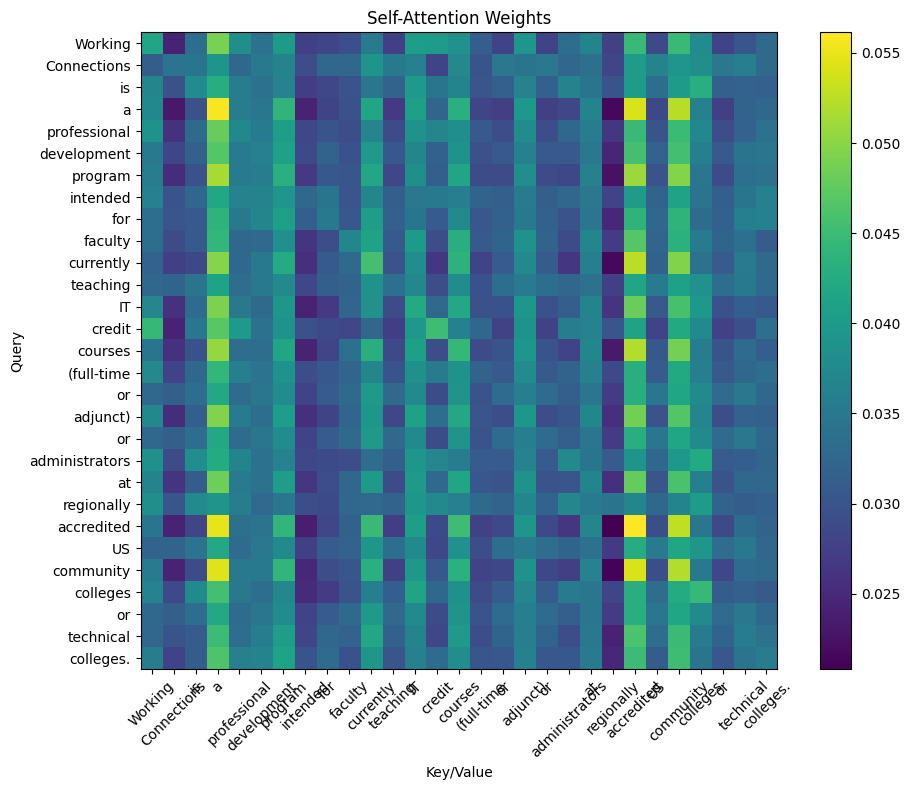

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple example sentence
sentence = 'Working Connections is a professional development program intended for faculty ' \
           'currently teaching IT credit courses (full-time or adjunct) or administrators ' \
           'at regionally accredited US community colleges or technical colleges.'
tokens = sentence.split()

# Create simple word embeddings (random for this example)
embedding_dim = 4
embeddings = {word: np.random.rand(embedding_dim) for word in tokens}

# Create matrices Q, K, V
Q = np.array([embeddings[word] for word in tokens])  # Query
K = np.array([embeddings[word] for word in tokens])  # Key
V = np.array([embeddings[word] for word in tokens])  # Value

# Compute attention scores
scores = np.dot(Q, K.T)
print("Raw attention scores:")
print(scores)

# Apply scaling
d_k = embedding_dim
scaled_scores = scores / np.sqrt(d_k)
print("\nScaled attention scores:")
print(scaled_scores)

# Apply softmax to get attention weights
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

attention_weights = softmax(scaled_scores)
print("\nAttention weights after softmax:")
print(attention_weights)

# Get weighted sum of values
attention_output = np.dot(attention_weights, V)
print("\nAttention output:")
print(attention_output)

# Visualize attention weights
plt.figure(figsize=(10, 8))
plt.imshow(attention_weights, cmap='viridis')
plt.xticks(range(len(tokens)), tokens, rotation=45)
plt.yticks(range(len(tokens)), tokens)
plt.xlabel('Key/Value')
plt.ylabel('Query')
plt.title('Self-Attention Weights')
plt.colorbar()
plt.tight_layout()
plt.savefig('attention_weights.png')
plt.show()

## Masked Self-Attention for Decoders

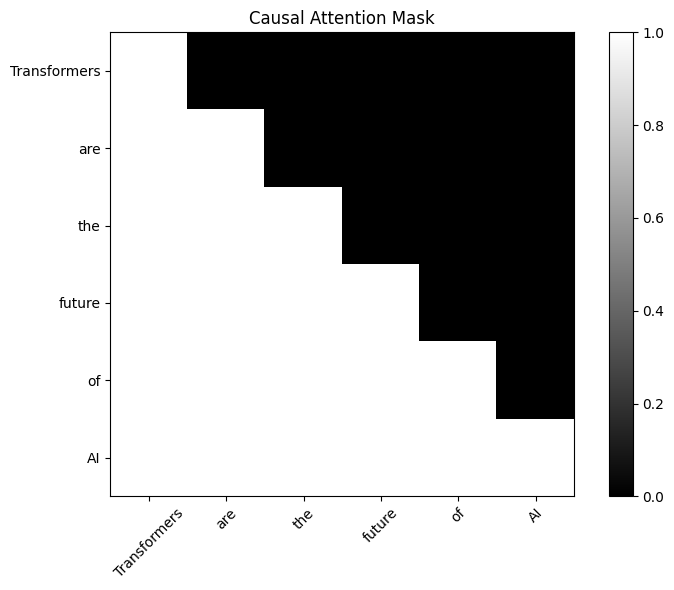

Raw attention scores:
[[ 0.91901043  0.57633648 -0.79301477 -0.57966285 -1.14177367 -0.44473088]
 [ 0.94828327  0.76966137  0.92550993  1.19604844  0.45236495 -0.09926534]
 [ 1.75341671 -1.6484959   0.56384974 -0.44548458  0.40423009 -0.18442279]
 [ 0.60153512 -0.0548324   0.13835859  0.6615704   1.32240918  0.18248957]
 [ 1.18696469 -0.29924449 -1.32322201  1.16595395 -1.23387746  0.57284014]
 [-0.77536901 -0.27565188  1.29041393 -1.17726162 -0.29684968 -0.17059264]]

Masked attention scores:
[[ 9.19010425e-01 -1.00000000e+09 -1.00000000e+09 -1.00000000e+09
  -1.00000000e+09 -1.00000000e+09]
 [ 9.48283266e-01  7.69661368e-01 -1.00000000e+09 -1.00000000e+09
  -1.00000000e+09 -1.00000000e+09]
 [ 1.75341671e+00 -1.64849590e+00  5.63849741e-01 -1.00000000e+09
  -1.00000000e+09 -1.00000000e+09]
 [ 6.01535124e-01 -5.48323963e-02  1.38358593e-01  6.61570396e-01
  -1.00000000e+09 -1.00000000e+09]
 [ 1.18696469e+00 -2.99244489e-01 -1.32322201e+00  1.16595395e+00
  -1.23387746e+00 -1.00000000e+

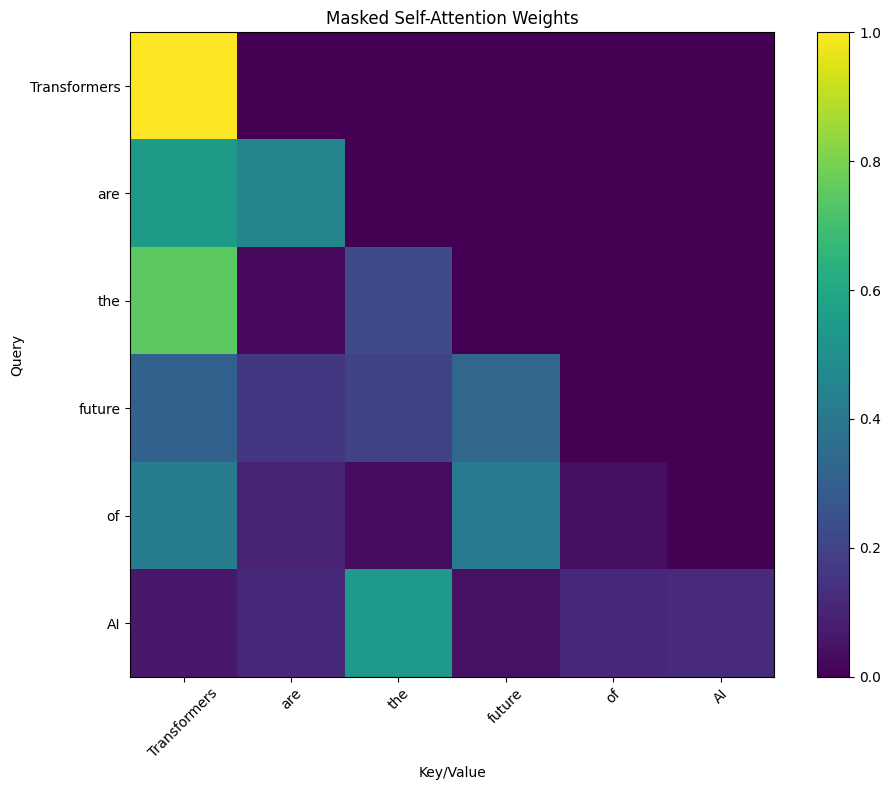

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example for masked self-attention (as used in decoders)
def masked_attention_demo():
    sentence = "Transformers are the future of AI"
    tokens = sentence.split()
    seq_len = len(tokens)

    # Create a mask (lower triangular matrix)
    mask = np.tril(np.ones((seq_len, seq_len)))

    # Visualize the mask
    plt.figure(figsize=(8, 6))
    plt.imshow(mask, cmap='gray')
    plt.xticks(range(seq_len), tokens, rotation=45)
    plt.yticks(range(seq_len), tokens)
    plt.title('Causal Attention Mask')
    plt.colorbar()
    plt.tight_layout()
    plt.savefig('attention_mask.png')
    plt.show()

    # Demonstrate effect on attention weights
    # Using random attention scores
    raw_scores = np.random.randn(seq_len, seq_len)
    print("Raw attention scores:")
    print(raw_scores)

    # Apply mask (set masked positions to -inf before softmax)
    masked_scores = np.where(mask == 1, raw_scores, -1e9)
    print("\nMasked attention scores:")
    print(masked_scores)

    # Apply softmax
    def softmax(x):
        exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

    masked_attn_weights = softmax(masked_scores)
    print("\nMasked attention weights after softmax:")
    print(masked_attn_weights)

    # Visualize the masked attention weights
    plt.figure(figsize=(10, 8))
    plt.imshow(masked_attn_weights, cmap='viridis')
    plt.xticks(range(seq_len), tokens, rotation=45)
    plt.yticks(range(seq_len), tokens)
    plt.xlabel('Key/Value')
    plt.ylabel('Query')
    plt.title('Masked Self-Attention Weights')
    plt.colorbar()
    plt.tight_layout()
    plt.savefig('masked_attention_weights.png')
    plt.show()

masked_attention_demo()

## Tokenization and Embedding Visualization

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

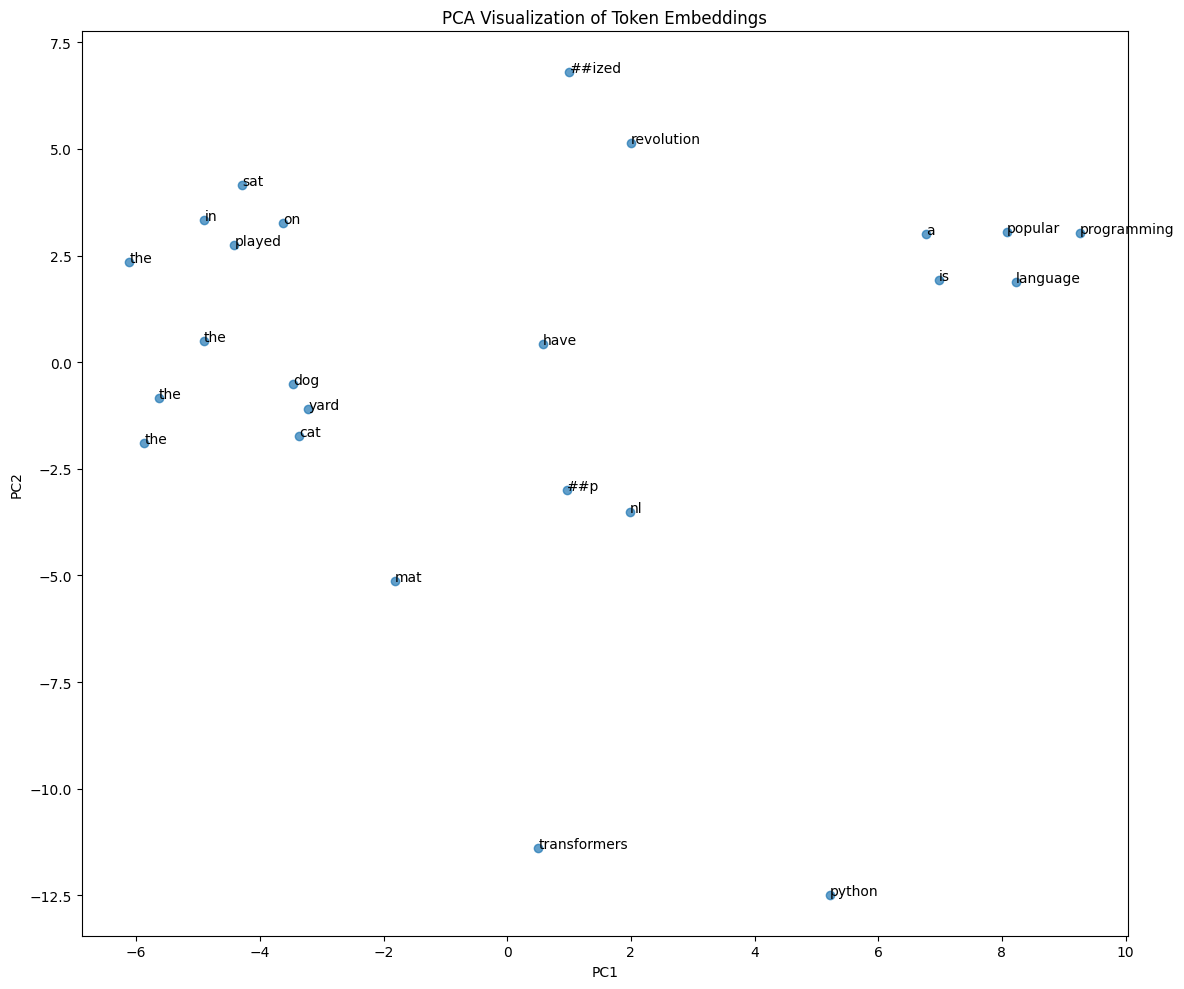

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_embeddings():
    # Load pretrained model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
    model = AutoModel.from_pretrained("bert-base-uncased")

    # Sample sentences
    sentences = [
        "The cat sat on the mat",
        "The dog played in the yard",
        "Transformers have revolutionized NLP",
        "Python is a popular programming language"
    ]

    # Tokenize sentences
    tokens = []
    embeddings = []

    for sentence in sentences:
        # Get tokens
        sentence_tokens = tokenizer.tokenize(sentence)
        tokens.extend(sentence_tokens)

        # Get embeddings
        inputs = tokenizer(sentence, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)

        # Get token embeddings (exclude special tokens)
        token_embeddings = outputs.last_hidden_state[0, 1:-1, :].detach().numpy()
        embeddings.append(token_embeddings)

    # Flatten list of embeddings
    all_embeddings = np.vstack([emb for emb in embeddings])

    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(all_embeddings)

    # Plot embeddings
    plt.figure(figsize=(12, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)

    # Add token labels
    for i, token in enumerate(tokens):
        plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title('PCA Visualization of Token Embeddings')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    plt.savefig('token_embeddings.png')
    plt.show()

visualize_embeddings()

## Positional Encoding Visualization

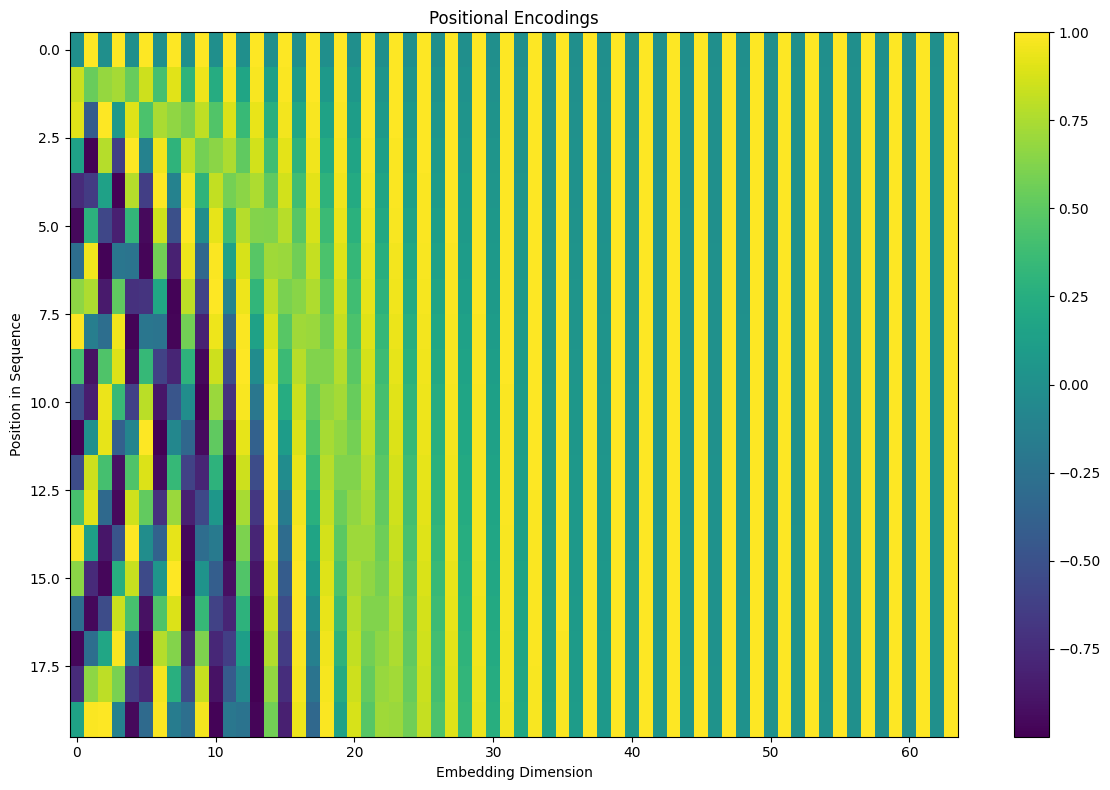

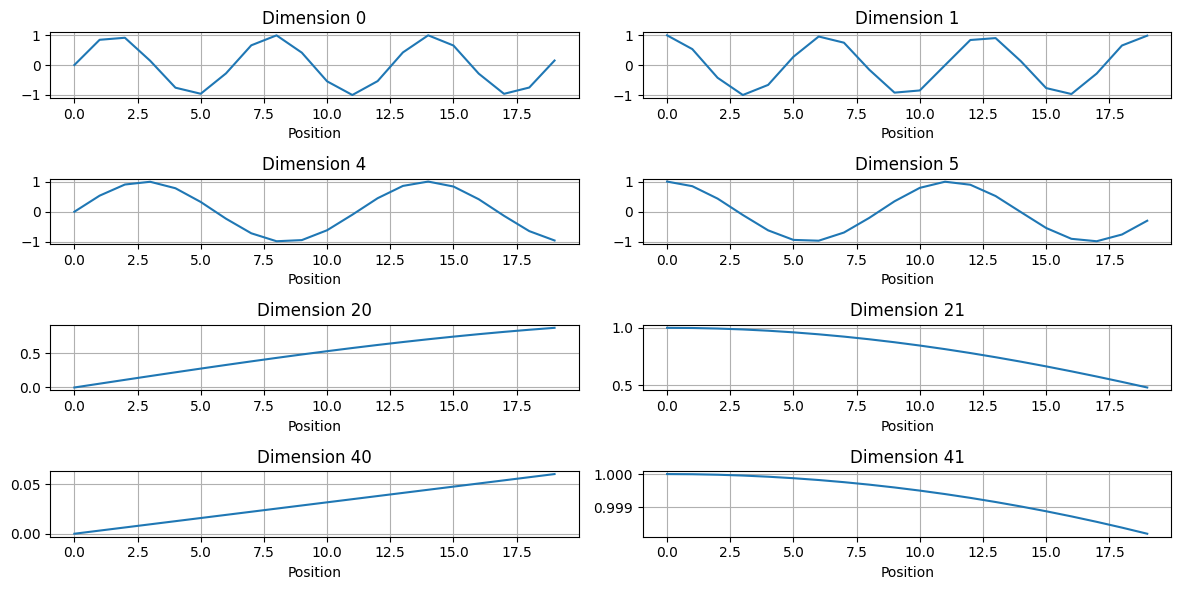

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding_demo():
    # Parameters
    seq_length = 20
    d_model = 64

    # Create positional encoding
    position = np.arange(seq_length)[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))

    pe = np.zeros((seq_length, d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)

    # Visualize as heatmap
    plt.figure(figsize=(12, 8))
    plt.imshow(pe, cmap='viridis', aspect='auto')
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Position in Sequence')
    plt.title('Positional Encodings')
    plt.colorbar()
    plt.tight_layout()
    plt.savefig('positional_encoding.png')

    # Plot specific dimensions
    plt.figure(figsize=(12, 6))
    dimensions = [0, 1, 4, 5, 20, 21, 40, 41]
    for i, dim in enumerate(dimensions):
        if dim < d_model:
            plt.subplot(len(dimensions)//2, 2, i+1)
            plt.plot(pe[:, dim])
            plt.title(f'Dimension {dim}')
            plt.xlabel('Position')
            plt.grid(True)

    plt.tight_layout()
    plt.savefig('positional_encoding_dimensions.png')
    plt.show()

positional_encoding_demo()